In [1]:
import pandas as pd
data = pd.read_csv("weatherAUS.csv")

In [2]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [3]:
data.shape

(36881, 24)

In [6]:
data.isnull().sum()

Date                 0
Location             0
MinTemp            338
MaxTemp            242
Rainfall           626
Evaporation      12846
Sunshine         13564
WindGustDir       3368
WindGustSpeed     3361
WindDir9am        2809
WindDir3pm         962
WindSpeed9am       662
WindSpeed3pm       646
Humidity9am        570
Humidity3pm        511
Pressure9am       3572
Pressure3pm       3552
Cloud9am         12500
Cloud3pm         12982
Temp9am            487
Temp3pm            444
RainToday          626
RISK_MM            620
RainTomorrow       620
dtype: int64

In [7]:
features = ['Location', 'MinTemp', 'MaxTemp', 'WindGustDir', 'WindGustSpeed', 'Humidity9am','Pressure9am', 'Temp9am', 'RainTomorrow']

In [8]:
data2= data[features]

In [9]:
data2.isnull().sum()

Location            0
MinTemp           338
MaxTemp           242
WindGustDir      3368
WindGustSpeed    3361
Humidity9am       570
Pressure9am      3572
Temp9am           487
RainTomorrow      620
dtype: int64

## datos categoricos
Location y WindGustDir

In [ ]:
moda = data2['WindGustDir'].mode()[0]
data2.loc[:,'WindGustDir'] = data2['WindGustDir'].fillna(moda) 

moda2 = data2['RainTomorrow'].mode()[0]
data2.loc[:,'RainTomorrow']  = data2['RainTomorrow'].fillna(moda2) 

data2.loc[:,'MinTemp'] = data2['MinTemp'].fillna(data2['MinTemp'].mean())
data2.loc[:,'MaxTemp'] = data2['MaxTemp'].fillna(data2['MaxTemp'].mean())
data2.loc[:,'WindGustSpeed'] = data2['WindGustSpeed'].fillna(data2['WindGustSpeed'].mean())
data2.loc[:,'Humidity9am'] = data2['Humidity9am'].fillna(data2['Humidity9am'].mean())
data2.loc[:,'Pressure9am'] = data2['Pressure9am'].fillna(data2['Pressure9am'].mean())
data2.loc[:,'Temp9am'] = data2['Temp9am'].fillna(data2['Temp9am'].mean())

In [11]:
data2.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
WindGustDir      0
WindGustSpeed    0
Humidity9am      0
Pressure9am      0
Temp9am          0
RainTomorrow     0
dtype: int64

In [ ]:
!pip install seaborn

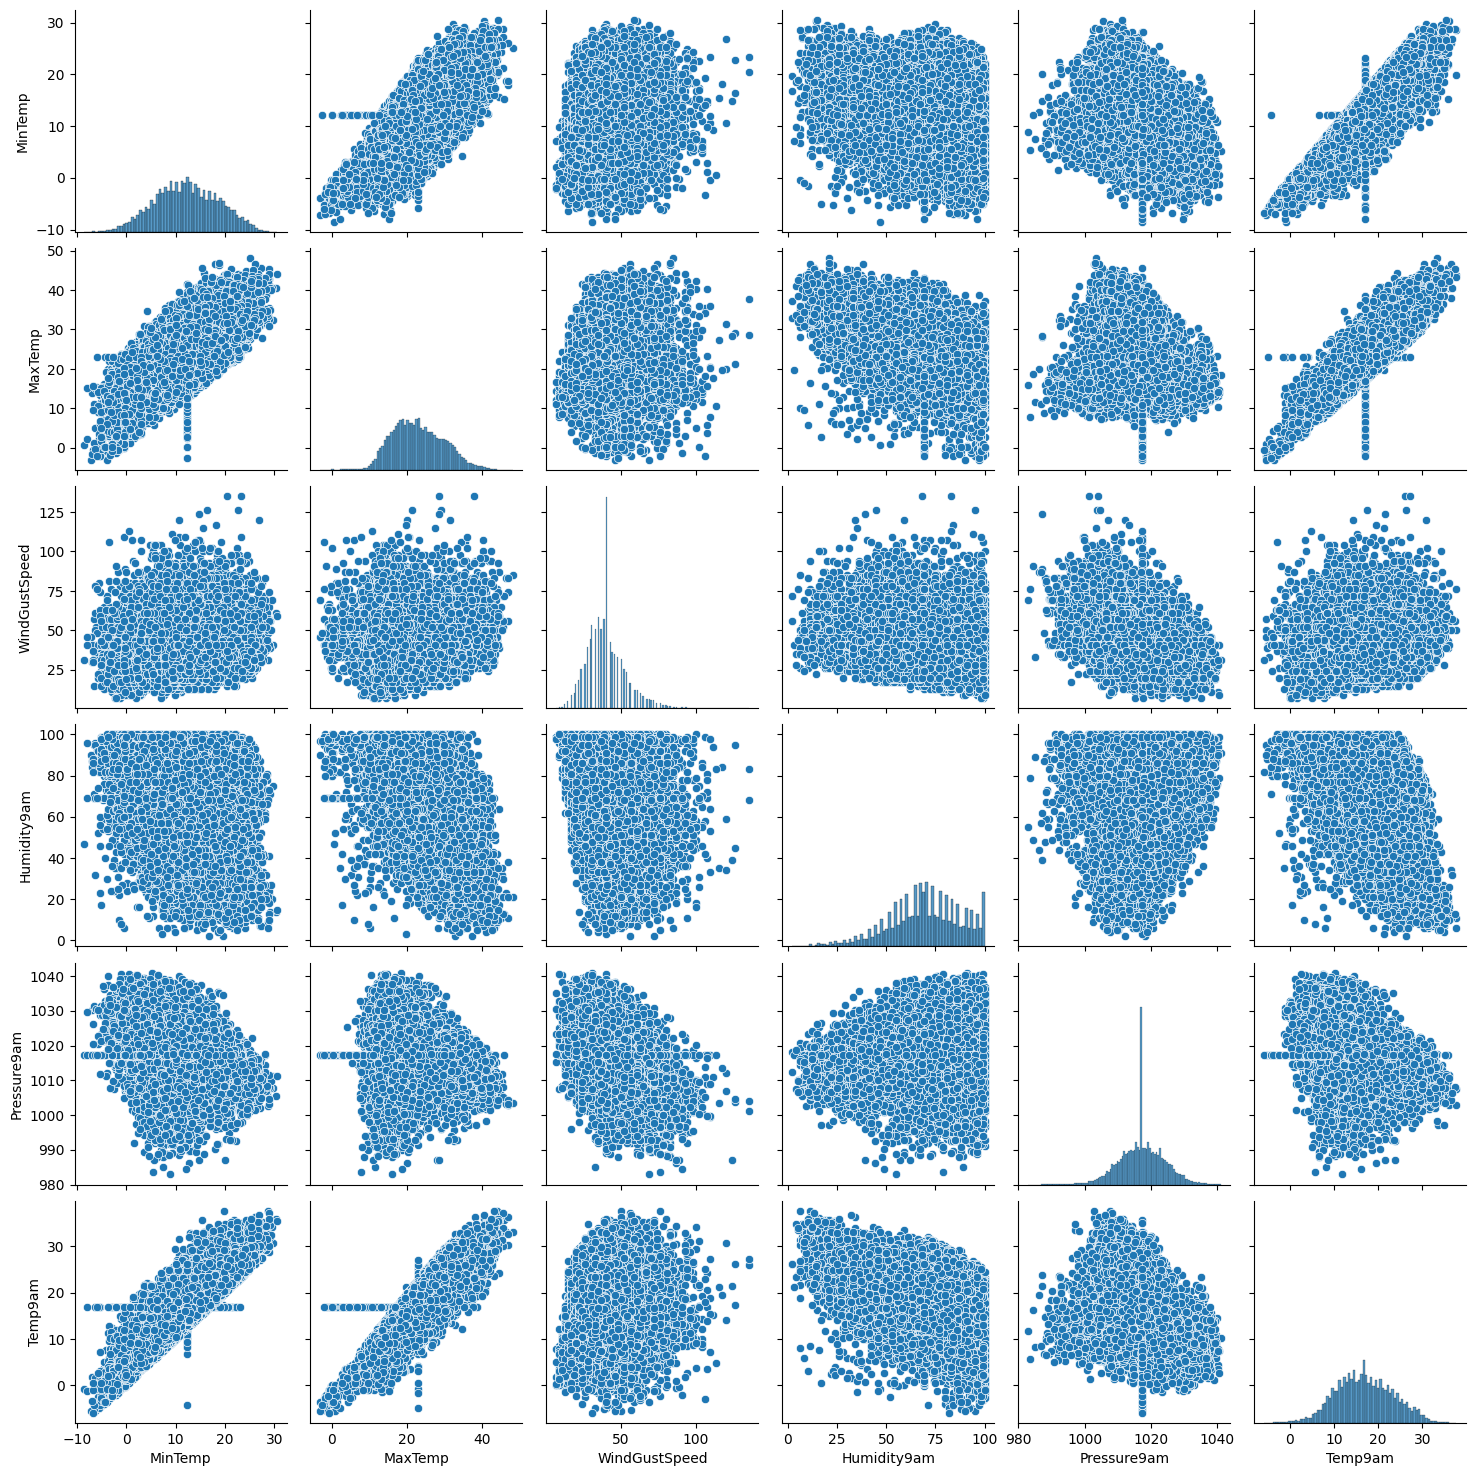

In [12]:
import seaborn as sns
sns.pairplot(data2)

<Axes: >

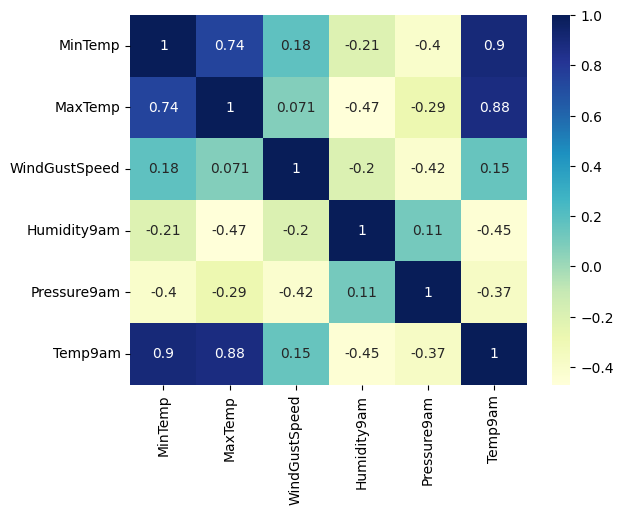

In [13]:
corr = data2.corr(numeric_only=True)
sns.heatmap(corr, cmap="YlGnBu", annot=True)

In [14]:
data3 = data2[['Location', 'WindGustDir', 'WindGustSpeed', 'Humidity9am','Pressure9am', 'Temp9am', 'RainTomorrow']]

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data3['LocationCode']= le.fit_transform(data3['Location'])
data3['WindGustDirCode']= le.fit_transform(data3['WindGustDir'])

C:\Users\profl3402\AppData\Local\Temp\ipykernel_20188\1598118633.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['LocationCode']= le.fit_transform(data3['Location'])


In [16]:
data3.head()

,Location,WindGustDir,WindGustSpeed,Humidity9am,Pressure9am,Temp9am,RainTomorrow,LocationCode,WindGustDirCode
0,Hobart,NW,30.0,65.0,1023.1,9.1,No,15,7
1,Launceston,SSW,50.0,99.0,1001.5,1.3,No,16,11
2,Williamtown,SSE,41.0,48.0,1020.9,22.7,No,42,10
3,PerthAirport,SW,54.0,50.0,1018.3,20.0,No,30,12
4,GoldCoast,NNW,43.0,64.0,1020.3,22.2,No,14,6


In [17]:
training_features = ['WindGustDirCode', 'WindGustSpeed', 'Humidity9am','Pressure9am', 'Temp9am', 'LocationCode']
X = data3[training_features]
Y = data3['RainTomorrow']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [19]:
print(X_train.shape)
print(X_test.shape)

(27660, 6)
(9221, 6)


In [20]:
from sklearn.linear_model import LogisticRegression
modelo = LogisticRegression(solver="liblinear")
modelo.fit(X_train, Y_train)

LogisticRegression(solver='liblinear')

In [21]:
#['WindGustDirCode', 'WindGustSpeed', 'Humidity9am','Pressure9am', 'Temp9am', 'LocationCode']
X_test

,WindGustDirCode,WindGustSpeed,Humidity9am,Pressure9am,Temp9am,LocationCode
15091,5,35.000000,89.0,1020.700000,19.6,14
17317,3,41.000000,79.0,1019.800000,12.5,18
34477,3,33.000000,96.0,1010.200000,22.1,20
21884,10,22.000000,86.0,1029.900000,8.5,18
34416,9,40.390573,72.0,1014.000000,23.4,35
...,...,...,...,...,...,...
1011,11,31.000000,86.0,1021.400000,10.2,41
12320,7,33.000000,79.0,1019.500000,7.9,17
33303,14,28.000000,91.0,1014.900000,9.7,19
22726,2,22.000000,99.0,1017.283152,16.4,28


In [22]:
y_pred = modelo.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_pred, Y_test)

In [24]:
acc

0.7903698080468495